# New Section

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
path=("/content/drive/MyDrive/internship/Titanic-Dataset.csv")

loading data into dataframe

In [9]:
dataframe=pd.read_csv(path)
dataframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
dataframe.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Age column have some null values.so we are taking an average values from age column and balancing



In [13]:
dataframe['Age'].fillna(dataframe['Age'].median(), inplace=True)

<ipython-input-13-c6698871014b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframe['Age'].fillna(dataframe['Age'].median(), inplace=True)


In [14]:
dataframe.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [15]:
dataframe['Embarked'].fillna(dataframe['Embarked'].mode()[0], inplace=True)

<ipython-input-15-fbce9dbf2bf3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframe['Embarked'].fillna(dataframe['Embarked'].mode()[0], inplace=True)


In [16]:
dataframe.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [17]:
dataframe.drop('Cabin',axis=1,inplace=True)

In [18]:
dataframe.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [26]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [27]:
le_sex = LabelEncoder()
dataframe['Sex'] = le_sex.fit_transform(dataframe['Sex'])  # male: 1, female: 0

le_embarked = LabelEncoder()
dataframe['Embarked'] = le_embarked.fit_transform(dataframe['Embarked'])

In [30]:
scaler = StandardScaler()
dataframe[['Age', 'Fare']] = scaler.fit_transform(dataframe[['Age', 'Fare']])

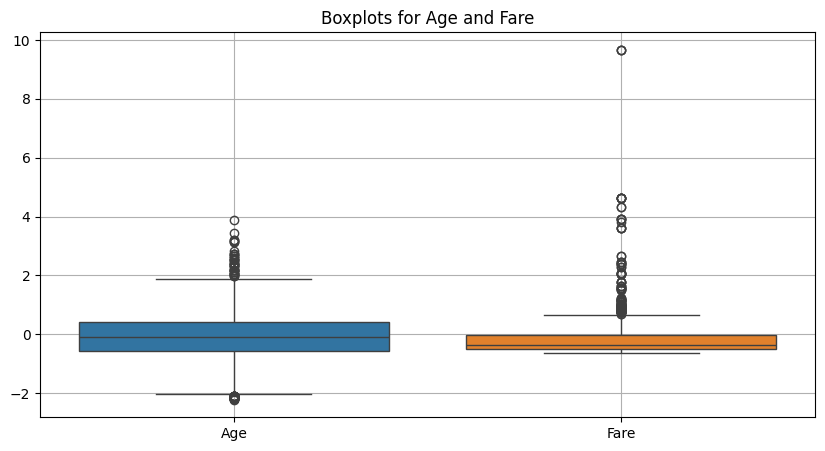

In [32]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=dataframe[['Age', 'Fare']])
plt.title("Boxplots for Age and Fare")
plt.grid(True)
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 * IQR)]

dataframe = remove_outliers(dataframe, 'Fare')
dataframe = remove_outliers(dataframe, 'Age')

# Final dataset ready for machine learning
X = dataframe.drop('Survived', axis=1)
y = dataframe['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head(), y_train.head()

(     PassengerId  Pclass                                      Name  Sex  \
 666          667       2               Butler, Mr. Reginald Fenton    1   
 32            33       3                  Glynn, Miss. Mary Agatha    0   
 611          612       3                     Jardin, Mr. Jose Neto    1   
 405          406       2                        Gale, Mr. Shadrach    1   
 300          301       3  Kelly, Miss. Anna Katherine "Annie Kate"    0   
 
           Age  SibSp  Parch              Ticket      Fare  Embarked  
 666 -0.335187      0      0              234686 -0.386671         2  
 32  -0.104637      0      0              335677 -0.492378         1  
 611 -0.104637      0      0  SOTON/O.Q. 3101305 -0.506472         2  
 405  0.356462      1      0               28664 -0.225593         2  
 300 -0.104637      0      0                9234 -0.492378         1  ,
 666    0
 32     1
 611    0
 405    0
 300    1
 Name: Survived, dtype: int64)

1. What are the different types of missing data?
MCAR (Missing Completely At Random): Missingness is unrelated to any data (observed or unobserved). Example: data lost due to system error.

MAR (Missing At Random): Missingness depends on observed data but not on the missing data itself. Example: older people less likely to respond, but age is recorded.

MNAR (Missing Not At Random): Missingness depends on the missing value itself. Example: people with high income refuse to disclose income.

2. How do you handle categorical variables?
Label Encoding: Assign integers to categories (useful for ordinal data).

One-Hot Encoding: Create binary columns for each category (useful for nominal data).

Target Encoding: Replace categories with a target variable statistic (use with caution).

Frequency Encoding: Replace categories with their frequency counts.

Embedding: Learn vector representations (mainly in deep learning).

3. What is the difference between normalization and standardization?
Normalization (Min-Max Scaling): Scales data to a fixed range, usually [0,1].

𝑥
′
=
𝑥
−
min
⁡
(
𝑥
)
max
⁡
(
𝑥
)
−
min
⁡
(
𝑥
)
x
′
 =
max(x)−min(x)
x−min(x)
​

Standardization (Z-score Scaling): Centers data around mean 0 with standard deviation 1.

𝑥
′
=
𝑥
−
𝜇
𝜎
x
′
 =
σ
x−μ
​

Use cases:
Normalization for bounded features or when you want values in [0,1].
Standardization when data follows Gaussian distribution or for many ML algorithms.

4. How do you detect outliers?
Statistical Methods:

Z-score (e.g., abs(z) > 3)

IQR (Interquartile Range): values outside
[
𝑄
1
−
1.5
×
𝐼
𝑄
𝑅
,
𝑄
3
+
1.5
×
𝐼
𝑄
𝑅
]
[Q1−1.5×IQR,Q3+1.5×IQR]

Visualization:

Box plots

Scatter plots

Model-based:

Isolation Forest

DBSCAN clustering

Domain Knowledge: Understanding the context to flag unusual points.

5. Why is preprocessing important in ML?
Improves model performance: Clean and consistent data allows models to learn better.

Handles noise and missing values: Reduces bias and variance.

Ensures compatibility: Models expect numerical, scaled, and well-structured data.

Speeds up training: Removes irrelevant or redundant info.

Prevents data leakage: Proper splits and transformations avoid biased evaluation.

6. What is one-hot encoding vs label encoding?
Label Encoding: Assigns an integer to each category.

Example: {Red=0, Green=1, Blue=2}

Good for ordinal categories but can imply false order for nominal data.

One-Hot Encoding: Creates binary columns per category.

Example: Red = [1,0,0], Green = [0,1,0], Blue = [0,0,1]

Prevents false order assumption; increases dimensionality.

7. How do you handle data imbalance?
Resampling:

Oversampling minority class (e.g., SMOTE)

Undersampling majority class

Use different metrics: Precision, Recall, F1-score, AUC instead of accuracy.

Generate synthetic data: Techniques like SMOTE or ADASYN.

Algorithmic approaches: Use models that handle imbalance (e.g., XGBoost with scale_pos_weight).

Ensemble methods: Balanced bagging, boosting.

8. Can preprocessing affect model accuracy?
Yes, absolutely.

Proper preprocessing can improve accuracy by making data more representative and easier to learn.

Poor preprocessing (e.g., leakage, improper scaling) can hurt model generalization.

Different algorithms have different preprocessing sensitivities.

Preprocessing pipelines must be consistent during training and inference.